##### 簡單計算機
這篇教學會透過 PyQt5 的 QPushButton、QLabel 組合成一個簡單的計算機，實作過程中會利用字典 ( dict ) 定義按鈕群組，\
搭配邏輯判斷進行點擊後數值的加減乘除運算。

##### 計算機畫面設計 
參考QLabel 標籤」教學範例，在畫面中加入 QLabel 顯示計算機數字和公式，接著參考「QPushButton 按鈕」教學範例，\
先建立一個字典型態的變數定義按鈕的文字 ( 鍵 ) 和座標位置 ( 值 )，並將座標要改變的幅度和寬高尺寸獨立成變數方便後續計算，\
定義完成後就能透過 for 迴圈，根據字典內容一次建立完成所有的按鈕。

* 注意 lambda 匿名函式裡需要額外加上 checked 參數。

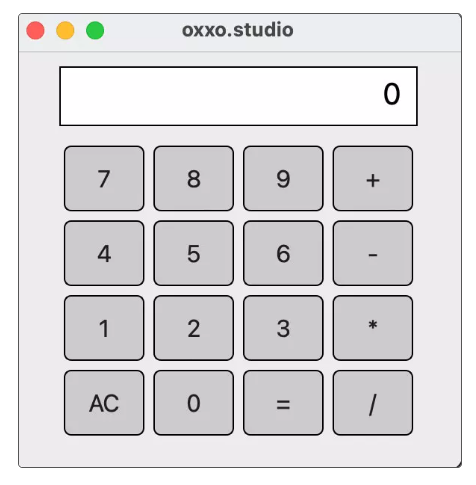

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtCore import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 280)

label = QtWidgets.QLabel(MainWindow)  # 建立 QLabel
label.setGeometry(30, 10, 240, 40)    # 定義位置
# 定義樣式
label.setStyleSheet('''
    background:#ffffff;
    border:1px solid #000;
    font-size:20px;
    padding:5px;
''')
label.setAlignment(Qt.AlignRight)    # 靠右對齊
label.setText('0')

# 定義按鈕群組中需要共用的變數
x = 30
y = 60
w = 60
h = 50

# 定義按鈕群組
btns = {
    '7':{'x':x,'y':y},
    '8':{'x':x+w,'y':y},
    '9':{'x':x+2*w,'y':y},
    '+':{'x':x+3*w,'y':y},
    '4':{'x':x,'y':y+h},
    '5':{'x':x+w,'y':y+h},
    '6':{'x':x+2*w,'y':y+h},
    '-':{'x':x+3*w,'y':y+h},
    '1':{'x':x,'y':y+2*h},
    '2':{'x':x+w,'y':y+2*h},
    '3':{'x':x+2*w,'y':y+2*h},
    '*':{'x':x+3*w,'y':y+2*h},
    'AC':{'x':x,'y':y+3*h},
    '0':{'x':x+w,'y':y+3*h},
    '=':{'x':x+2*w,'y':y+3*h},
    '/':{'x':x+3*w,'y':y+3*h},
}
# 依序取出按鈕群組中的每個項目
for i in btns:
    btns[i]['qw'] = QtWidgets.QPushButton(MainWindow) # 建立 QPuahButton
    # 定義樣式
    btns[i]['qw'].setStyleSheet('''
        QPushButton{
            font-size:16px;
            border-radius:5px;
            border:1px solid #000;
            background:#ccc;
            margin:3px;
        }
        QPushButton:pressed{
            background:#aaa;
        }
    ''')
    btns[i]['qw'].setText(i)   # 設定文字
    btns[i]['qw'].setGeometry(btns[i]['x'], btns[i]['y'], w, h)     # 設定位置和尺寸
    btns[i]['qw'].clicked.connect(lambda checked, n=i: showNum(n))  # 設定點擊按鈕時執行 showNum 函式

MainWindow.show()
sys.exit(app.exec_())

##### 計算機功能設計 
畫面設計完成後，接著編輯 showNum 函式內容：

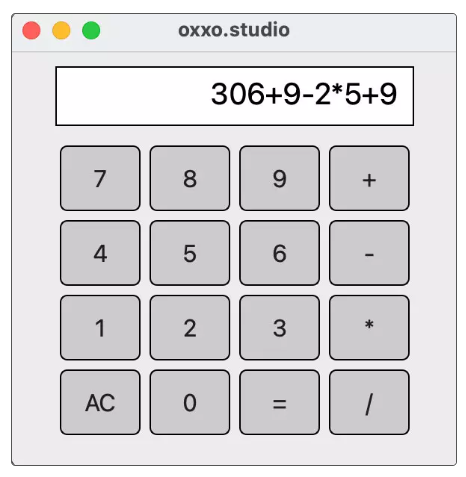

In [ ]:
# 顯示數字函式，n 為點擊按鈕時要帶入的數值
def showNum(n):
    global num
    if n == 'AC':
        num = '0'   # 如果按下數字，數值歸零
    elif n == '=':
        try:
            num = str(eval(num))  # 如果按下等號，使用 eval() 計算結果
        except:
            num = 'error'         # 如果計算結果發生錯誤，回傳 error
    else:
        if num == '0' and n in '0123456789':
            num = n     # 如果數值原本是 0，且按下數字鍵，就讓數字變成所按下的數字
        else:
            num = num + n   # 否則就用字串的方式累加
    label.setText(num)      # QLabel 顯示結果
    if num == 'error':
        num = '0'           # 如果發生錯誤，數值歸零

完整程式碼 

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtCore import *
import sys

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 280)

label = QtWidgets.QLabel(MainWindow)
label.setGeometry(30, 10, 240, 40)
label.setStyleSheet('''
    background:#ffffff;
    border:1px solid #000;
    font-size:20px;
    padding:5px;
''')
label.setAlignment(Qt.AlignRight)
label.setText('0')

num = '0'
def showNum(n):
    global num
    if n == 'AC':
        num = '0'
    elif n == '=':
        try:
            num = str(eval(num))
        except:
            num = 'error'
    else:
        if num == '0' and n in '0123456789':
            num = n
        else:
            num = num + n
    label.setText(num)
    if num == 'error':
        num = '0'

x = 30
y = 60
w = 60
h = 50
btns = {
    '7':{'x':x,'y':y},
    '8':{'x':x+w,'y':y},
    '9':{'x':x+2*w,'y':y},
    '+':{'x':x+3*w,'y':y},
    '4':{'x':x,'y':y+h},
    '5':{'x':x+w,'y':y+h},
    '6':{'x':x+2*w,'y':y+h},
    '-':{'x':x+3*w,'y':y+h},
    '1':{'x':x,'y':y+2*h},
    '2':{'x':x+w,'y':y+2*h},
    '3':{'x':x+2*w,'y':y+2*h},
    '*':{'x':x+3*w,'y':y+2*h},
    'AC':{'x':x,'y':y+3*h},
    '0':{'x':x+w,'y':y+3*h},
    '=':{'x':x+2*w,'y':y+3*h},
    '/':{'x':x+3*w,'y':y+3*h},
}

for i in btns:
    btns[i]['qw'] = QtWidgets.QPushButton(MainWindow)
    btns[i]['qw'].setStyleSheet('''
        QPushButton{
            font-size:16px;
            border-radius:5px;
            border:1px solid #000;
            background:#ccc;
            margin:3px;
        }
        QPushButton:pressed{
            background:#aaa;
        }
    ''')
    btns[i]['qw'].setText(i)
    btns[i]['qw'].setGeometry(btns[i]['x'], btns[i]['y'], w, h)
    btns[i]['qw'].clicked.connect(lambda checked, n=i: showNum(n))

MainWindow.show()
sys.exit(app.exec_())

使用 class 寫法：

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtCore import *
import sys

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(300, 280)
        self.ui()

    def ui(self):
        self.label = QtWidgets.QLabel(self)
        self.label.setGeometry(30, 10, 240, 40)
        self.label.setStyleSheet('''
            background:#ffffff;
            border:1px solid #000;
            font-size:20px;
            padding:5px;
        ''')
        self.label.setAlignment(Qt.AlignRight)
        self.label.setText('0')
        self.num = '0'

        x = 30
        y = 60
        w = 60
        h = 50
        self.btns = {
            '7':{'x':x,'y':y},
            '8':{'x':x+w,'y':y},
            '9':{'x':x+2*w,'y':y},
            '+':{'x':x+3*w,'y':y},
            '4':{'x':x,'y':y+h},
            '5':{'x':x+w,'y':y+h},
            '6':{'x':x+2*w,'y':y+h},
            '-':{'x':x+3*w,'y':y+h},
            '1':{'x':x,'y':y+2*h},
            '2':{'x':x+w,'y':y+2*h},
            '3':{'x':x+2*w,'y':y+2*h},
            '*':{'x':x+3*w,'y':y+2*h},
            'AC':{'x':x,'y':y+3*h},
            '0':{'x':x+w,'y':y+3*h},
            '=':{'x':x+2*w,'y':y+3*h},
            '/':{'x':x+3*w,'y':y+3*h},
        }

        for i in self.btns:
            self.btns[i]['qw'] = QtWidgets.QPushButton(self)
            self.btns[i]['qw'].setStyleSheet('''
                QPushButton{
                    font-size:16px;
                    border-radius:5px;
                    border:1px solid #000;
                    background:#ccc;
                    margin:3px;
                }
                QPushButton:pressed{
                    background:#aaa;
                }
            ''')
            self.btns[i]['qw'].setText(i)
            self.btns[i]['qw'].setGeometry(self.btns[i]['x'], self.btns[i]['y'], w, h)
            self.btns[i]['qw'].clicked.connect(lambda checked, n=i: self.showNum(n))

    def showNum(self, n):
        if n == 'AC':
            self.num = '0'
        elif n == '=':
            try:
                self.num = str(eval(self.num))
            except:
                self.num = 'error'
        else:
            if self.num == '0' and n in '0123456789':
                self.num = n
            else:
                self.num = self.num + n
        self.label.setText(self.num)
        if self.num == 'error':
            self.num = '0'

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())